## Análise Exploratória dos Dados (EDA)

Cliente cujo o core business é compra e venda de veículos usados, está com dificuldades na área de revenda dos automóveis usados em seu catálogo.

Analisaremos uma base de dados de um marketplace de compra e venda para entender melhor o mercado nacional, de forma a auxiliar na precificação dos carros.

####  3 Hipóteses a desenvolver: 
1. Veículos com garantia de fábrica podem ter maior apelo e serem vendidos a preços mais altos.
2. Veículos com apenas um dono são mais valorizados pelos compradores e podem ter preços mais altos.
3. Veículos com menor quilometragem têm maior demanda e podem ter preços mais altos.

####  Questionamentos a responder:
- Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
- Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
- Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# configurando pandas para não mostrar notação científica para números
pd.set_option('display.float_format',lambda x: '%.2f' % x)

In [2]:
df_carros = pd.read_csv('./cars_train.csv', encoding='utf-16', sep='\t')

In [3]:
df_carros.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.00,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.00,67772.00,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.59
1,279639842134129588306469566150288644214,8.00,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.00,62979.00,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.33
2,56414460810621048900295678236538171981,16.00,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.00,44070.00,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.81
3,56862509826849933428086372390159405545,14.00,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.00,85357.00,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.36
4,338980975753200343894519909855598027197,8.00,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.00,71491.00,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.76


In [4]:
# Verificando a quantidade de linhas e colunas
df_carros.shape

(29584, 29)

In [5]:
df_carros.columns

Index(['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica',
       'revisoes_dentro_agenda', 'veiculo_alienado', 'preco'],
      dtype='object')

In [6]:
#verificando os tipos 
df_carros.dtypes

id                          object
num_fotos                  float64
marca                       object
modelo                      object
versao                      object
ano_de_fabricacao            int64
ano_modelo                 float64
hodometro                  float64
cambio                      object
num_portas                   int64
tipo                        object
blindado                    object
cor                         object
tipo_vendedor               object
cidade_vendedor             object
estado_vendedor             object
anunciante                  object
entrega_delivery              bool
troca                         bool
elegivel_revisao              bool
dono_aceita_troca           object
veiculo_único_dono          object
revisoes_concessionaria     object
ipva_pago                   object
veiculo_licenciado          object
garantia_de_fábrica         object
revisoes_dentro_agenda      object
veiculo_alienado           float64
preco               

In [7]:
#Verificando as informações contidas
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [8]:
#verificando valores faltantes
df_carros.isnull().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64

In [9]:
df_carros.isnull().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64

In [10]:
#Retirada do campo 'veiculo_alienado', pois não possui informação.
df_carros = df_carros.drop('veiculo_alienado', axis=1)

Para as colunas categóricas que estão com "missing value" e possuem apenas um valor preenchido (ex: 'dono_aceita_troca' que só possui 'Aceita troca' e NaN), trocaremos o valor existente para '1' e em seguida faremos o tratamento dos missing values para '0'. Neste caso a coluna 'dono_aceita_troca' passará a ter 1 para sim, e 0 para não. 

Partindo da premissa que os valores não informados (NaN) correspondem à negativa da informação.

In [11]:
# Mapear Colunas com respostas únicas para 1
df_carros['dono_aceita_troca'] = df_carros['dono_aceita_troca'].map({'Aceita troca': 1})
df_carros['veiculo_único_dono'] = df_carros['veiculo_único_dono'].map({'Único dono': 1})
df_carros['revisoes_concessionaria'] = df_carros['revisoes_concessionaria'].map({'Todas as revisões feitas pela concessionária': 1})
df_carros['ipva_pago'] = df_carros['ipva_pago'].map({'IPVA pago': 1})
df_carros['veiculo_licenciado'] = df_carros['veiculo_licenciado'].map({'Licenciado': 1})
df_carros['garantia_de_fábrica'] = df_carros['garantia_de_fábrica'].map({'Garantia de fábrica': 1})
df_carros['revisoes_dentro_agenda'] = df_carros['revisoes_dentro_agenda'].map({'Todas as revisões feitas pela agenda do carro': 1})

In [12]:
# Preencher valores NaN com 0
df_carros['dono_aceita_troca'].fillna(0, inplace=True)
df_carros['veiculo_único_dono'].fillna(0, inplace=True)
df_carros['revisoes_concessionaria'].fillna(0, inplace=True)
df_carros['ipva_pago'].fillna(0, inplace=True)
df_carros['veiculo_licenciado'].fillna(0, inplace=True)
df_carros['garantia_de_fábrica'].fillna(0, inplace=True)
df_carros['revisoes_dentro_agenda'].fillna(0, inplace=True)

In [13]:
df_carros.isnull().sum()

id                           0
num_fotos                  177
marca                        0
modelo                       0
versao                       0
ano_de_fabricacao            0
ano_modelo                   0
hodometro                    0
cambio                       0
num_portas                   0
tipo                         0
blindado                     0
cor                          0
tipo_vendedor                0
cidade_vendedor              0
estado_vendedor              0
anunciante                   0
entrega_delivery             0
troca                        0
elegivel_revisao             0
dono_aceita_troca            0
veiculo_único_dono           0
revisoes_concessionaria      0
ipva_pago                    0
veiculo_licenciado           0
garantia_de_fábrica          0
revisoes_dentro_agenda       0
preco                        0
dtype: int64

In [14]:
df_carros['garantia_de_fábrica'].value_counts()

0.00    25219
1.00     4365
Name: garantia_de_fábrica, dtype: int64

In [15]:
df_carros.columns

Index(['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica',
       'revisoes_dentro_agenda', 'preco'],
      dtype='object')

In [16]:
# Distribuição das variáveis categóricas

print(df_carros['revisoes_concessionaria'].value_counts())
print(df_carros['veiculo_único_dono'].value_counts())
print(df_carros['dono_aceita_troca'].value_counts())
print(df_carros['elegivel_revisao'].value_counts())
print(df_carros['troca'].value_counts())
print(df_carros['entrega_delivery'].value_counts())
print(df_carros['anunciante'].value_counts())
'''
print(df_carros['estado_vendedor'].value_counts())
print(df_carros['cidade_vendedor'].value_counts())
print(df_carros['tipo_vendedor'].value_counts())
print(df_carros['cor'].value_counts())
print(df_carros['blindado'].value_counts())
print(df_carros['tipo'].value_counts())
print(df_carros['cambio'].value_counts())
print(df_carros['marca'].value_counts())
print(df_carros['modelo'].value_counts())

'''

0.00    20412
1.00     9172
Name: revisoes_concessionaria, dtype: int64
0.00    19161
1.00    10423
Name: veiculo_único_dono, dtype: int64
1.00    21922
0.00     7662
Name: dono_aceita_troca, dtype: int64
False    29584
Name: elegivel_revisao, dtype: int64
False    24523
True      5061
Name: troca, dtype: int64
False    23601
True      5983
Name: entrega_delivery, dtype: int64
Pessoa Física                       17999
Loja                                 9879
Concessionária                       1702
Acessórios e serviços para autos        4
Name: anunciante, dtype: int64


"\nprint(df_carros['estado_vendedor'].value_counts())\nprint(df_carros['cidade_vendedor'].value_counts())\nprint(df_carros['tipo_vendedor'].value_counts())\nprint(df_carros['cor'].value_counts())\nprint(df_carros['blindado'].value_counts())\nprint(df_carros['tipo'].value_counts())\nprint(df_carros['cambio'].value_counts())\nprint(df_carros['marca'].value_counts())\nprint(df_carros['modelo'].value_counts())\n\n"

In [17]:
### Marca e Modelos mais listados
marca_mais_comum = df_carros['marca'].value_counts().idxmax()
modelo_mais_comum = df_carros['modelo'].value_counts().idxmax()

print("Marca mais comum:", marca_mais_comum)
print("Modelo mais comum:", modelo_mais_comum)

Marca mais comum: VOLKSWAGEN
Modelo mais comum: COMPASS


### Estatística Descritiva
Verificar as medidas estatísticas, como tendência central, dispersão, separatrizes, distribuições. Tratamento de outliers para predição do target a ser cobrado pelo carro.

In [18]:
df_carros.describe([.1,.2,.3,.4,.5,.6,.7,.8,.9])

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
count,29407.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00
mean,10.32,2016.76,2017.81,58430.59,3.94,0.74,0.35,0.31,0.66,0.54,0.15,0.20,133023.88
std,3.49,4.06,2.67,32561.77,0.34,0.44,0.48,0.46,0.47,0.50,0.35,0.40,81662.87
min,8.00,1985.00,1997.00,100.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9869.95
10%,8.00,2013.00,2014.00,17953.40,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,54443.66
20%,8.00,2014.00,2015.00,27407.40,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,69320.45
30%,8.00,2016.00,2017.00,35289.90,4.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,83559.10
40%,8.00,2017.00,2017.00,45657.40,4.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,97878.02
50%,8.00,2018.00,2018.00,57434.00,4.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,114355.80
60%,8.00,2018.00,2019.00,67993.20,4.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,132245.83


### Tratamento de Outliers
Retirada do outliers de preço e ano de fabricação, pois temos carros com valores muito elevados e ano de fabricação muito antigos, que prejudicam a performance do algoritmo de predição.

In [19]:
preco_percentil_99 = df_carros['preco'].describe(percentiles=[.99])['99%']


In [20]:
df_carros_work = df_carros.loc[df_carros['preco'] < preco_percentil_99]

In [21]:
df_carros_work['ano_de_fabricacao'].describe(percentiles=[.02])

count   29288.00
mean     2016.76
std         4.08
min      1985.00
2%       2002.00
50%      2018.00
max      2022.00
Name: ano_de_fabricacao, dtype: float64

In [22]:
ano_percentil_02 = df_carros_work['ano_de_fabricacao'].describe(percentiles=[.02])['2%']

In [23]:
df_carros_work = df_carros_work.loc[df_carros['ano_de_fabricacao'] > ano_percentil_02]

In [24]:
df_carros_work.shape

(28656, 28)

In [25]:
df_carros_work.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
count,28479.00,28656.00,28656.00,28656.00,28656.00,28656.00,28656.00,28656.00,28656.00,28656.00,28656.00,28656.00,28656.00
mean,10.34,2017.16,2017.93,57256.10,3.95,0.74,0.36,0.31,0.67,0.54,0.15,0.20,130898.94
std,3.49,3.01,2.57,30673.55,0.33,0.44,0.48,0.46,0.47,0.50,0.36,0.40,71768.08
min,8.00,2003.00,2008.00,100.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13642.89
25%,8.00,2015.00,2017.00,31150.75,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77856.19
50%,8.00,2018.00,2018.00,56682.50,4.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,115224.26
75%,14.00,2020.00,2020.00,80890.50,4.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,163039.25
max,21.00,2022.00,2023.00,227684.00,4.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,404036.88


In [47]:
# Exportação do dataframe trabalhado para utilização no notebook de predição de preços
df_carros_work.to_csv('./base_carros_EDA.csv')

## Análise Exploratória dos Dados (EDA)

### Análises Gerais
#### Quantidade de Carros por Preço

<Axes: xlabel='preco', ylabel='Count'>

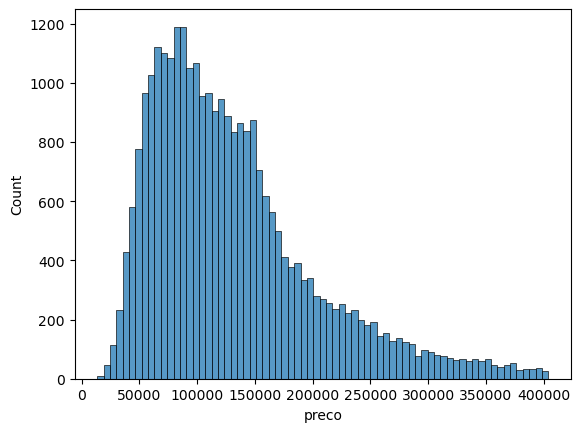

In [26]:
sns.histplot(df_carros_work['preco'])

#### Quantidade de Carros por Marca

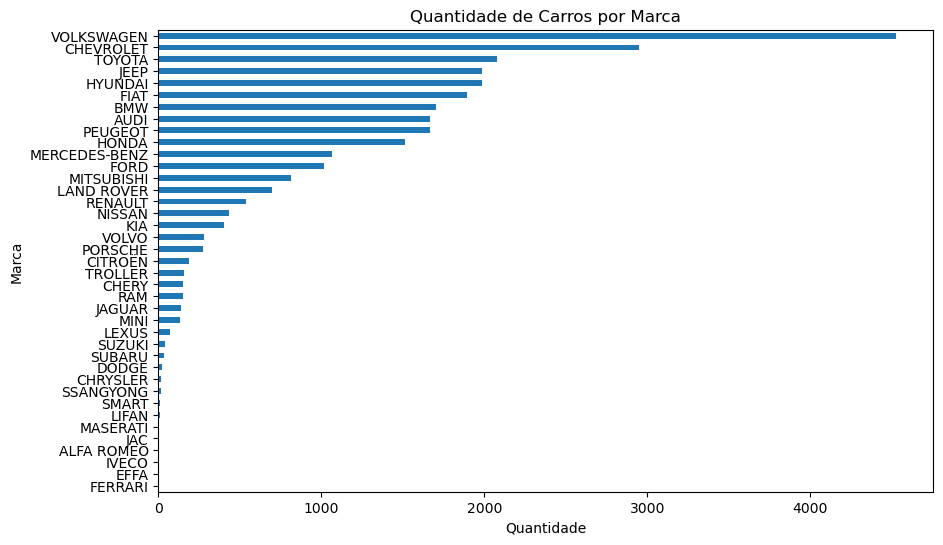

In [27]:
plt.figure(figsize=(10, 6))
df_carros_work['marca'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Quantidade')
plt.ylabel('Marca')
plt.title('Quantidade de Carros por Marca')
plt.show()

#### Quantidade de carros por Modelo (Top 10)

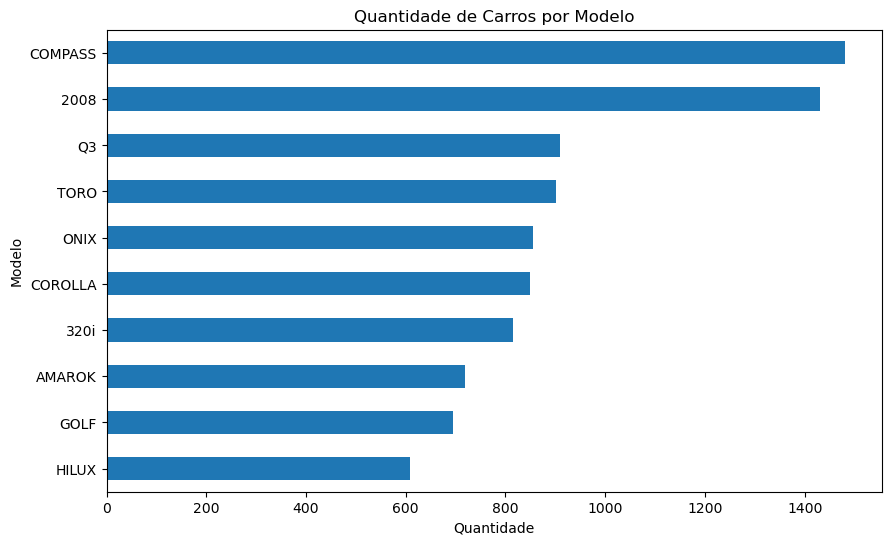

In [28]:
plt.figure(figsize=(10, 6))
df_carros_work['modelo'].value_counts().sort_values(ascending=True)[-10:].plot(kind='barh')
plt.xlabel('Quantidade')
plt.ylabel('Modelo')
plt.title('Quantidade de Carros por Modelo')
plt.show()

#### Quantidade de modelos para as duas principais marcas (VOLKSWAGEN e CHEVROLET)

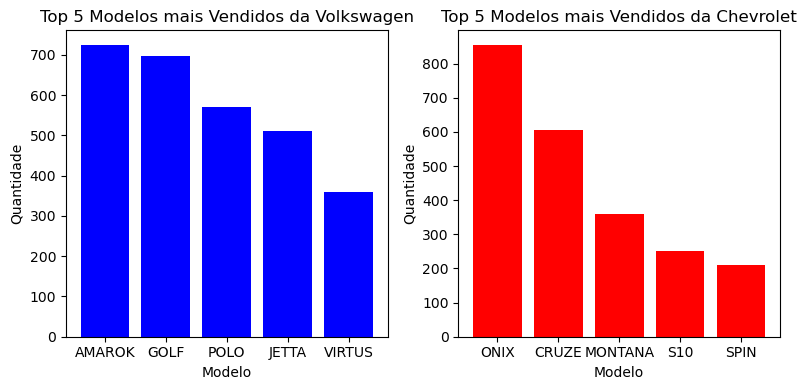

In [29]:
# Filtrar o dataframe para incluir apenas as duas principais marcas
df_filtrado = df_carros[df_carros['marca'].isin(['VOLKSWAGEN', 'CHEVROLET'])]

# Contar a quantidade de ocorrências de cada modelo para cada marca
contagem_modelos = df_filtrado.groupby(['marca', 'modelo']).size().unstack()

# Selecionar os 5 modelos com maior contagem para cada marca
top_5_modelos_vw = contagem_modelos.loc['VOLKSWAGEN'].nlargest(5)
top_5_modelos_chevrolet = contagem_modelos.loc['CHEVROLET'].nlargest(5)

# Plotar os dois gráficos separados na mesma figura
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Gráfico dos modelos mais vendidos da Volkswagen
ax[0].bar(top_5_modelos_vw.index, top_5_modelos_vw.values, color='blue')
ax[0].set_xlabel('Modelo')
ax[0].set_ylabel('Quantidade')
ax[0].set_title('Top 5 Modelos mais Vendidos da Volkswagen')

# Gráfico dos modelos mais vendidos da Chevrolet
ax[1].bar(top_5_modelos_chevrolet.index, top_5_modelos_chevrolet.values, color='red')
ax[1].set_xlabel('Modelo')
ax[1].set_ylabel('Quantidade')
ax[1].set_title('Top 5 Modelos mais Vendidos da Chevrolet')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()

#### Quantidade de carros por tipo de vendedor

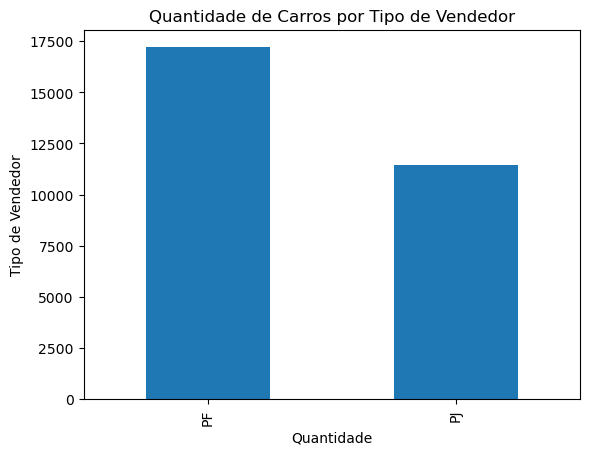

In [30]:
df_carros_work['tipo_vendedor'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Vendedor')
plt.title('Quantidade de Carros por Tipo de Vendedor')
plt.show()

#### Distribuição de carros por cor

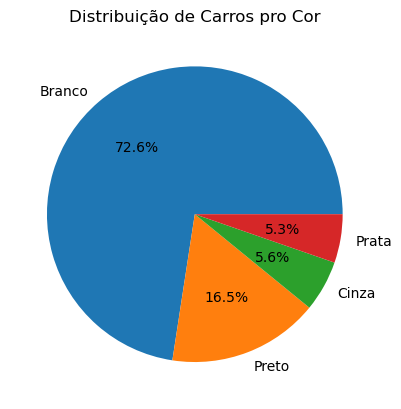

In [31]:
# Obter a contagem de cores e selecionar as 4 cores mais frequentes
top_4_cores = df_carros_work['cor'].value_counts().nlargest(4)

# Criar um novo dataframe apenas com as 4 cores mais frequentes
df_carros_cores = df_carros_work[df_carros_work['cor'].isin(top_4_cores.index)]

# Criar o gráfico de pizza com as 4 cores mais frequentes
plt.pie(df_carros_cores['cor'].value_counts(), labels=df_carros_cores['cor'].unique(), autopct='%1.1f%%')
plt.title('Distribuição de Carros pro Cor')
plt.show()

#### Distribuição dos anos de fabricação dos carros

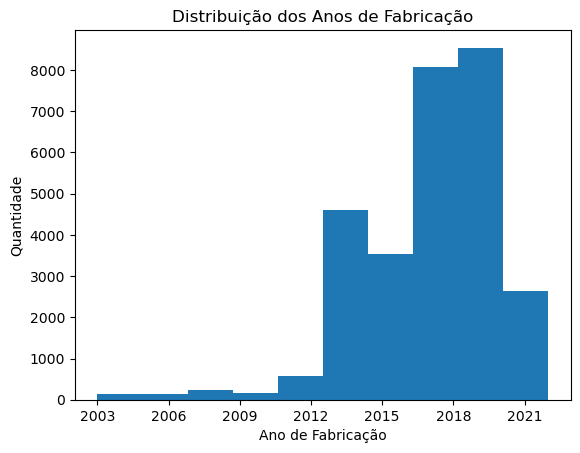

In [32]:
plt.hist(df_carros_work['ano_de_fabricacao'], bins=10)
plt.xlabel('Ano de Fabricação')
plt.ylabel('Quantidade')
plt.title('Distribuição dos Anos de Fabricação')
plt.xticks(range(int(min(df_carros_work['ano_de_fabricacao'])), int(max(df_carros_work['ano_de_fabricacao']))+1, 3))
plt.show()

#### Quantidade de carros por Estado (UF)

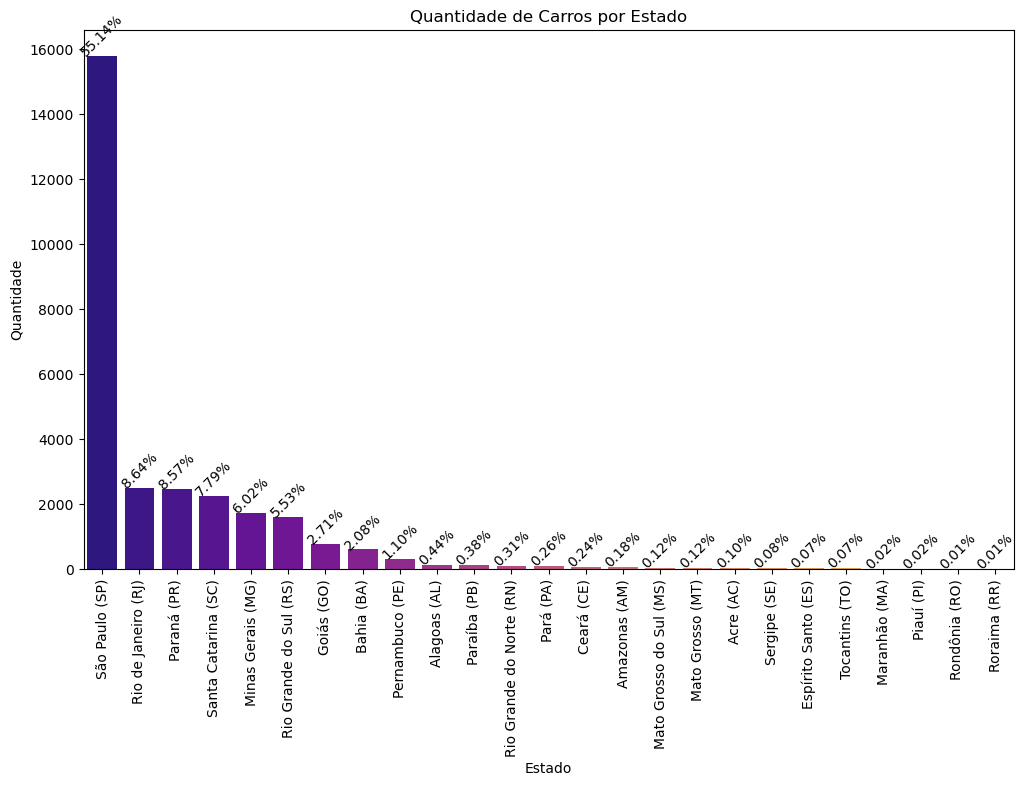

In [33]:
# Calcular a quantidade de carros por estado
quantidade_por_estado = df_carros_work['estado_vendedor'].value_counts()

# Calcular o percentual de cada estado sobre o total de carros
percentual_por_estado = (quantidade_por_estado / quantidade_por_estado.sum()) * 100

# Ordenar os estados pelo número de carros
quantidade_por_estado = quantidade_por_estado.sort_values(ascending=False)
percentual_por_estado = percentual_por_estado.loc[quantidade_por_estado.index]

# Criar o gráfico de barras
plt.figure(figsize=(12, 7))
sns.barplot(x=quantidade_por_estado.index, y=quantidade_por_estado.values, palette='plasma')
plt.xlabel('Estado')
plt.ylabel('Quantidade')
plt.title('Quantidade de Carros por Estado')

# Adicionar rótulos acima de cada barra com o percentual
for i, j in enumerate(percentual_por_estado):
    plt.text(i, quantidade_por_estado[i] + 10, f'{j:.2f}%', ha='center',rotation=45)

plt.xticks(rotation=90)
plt.show()

#### Heatmap de algumas variáveis preditoras com a variável target (preço)

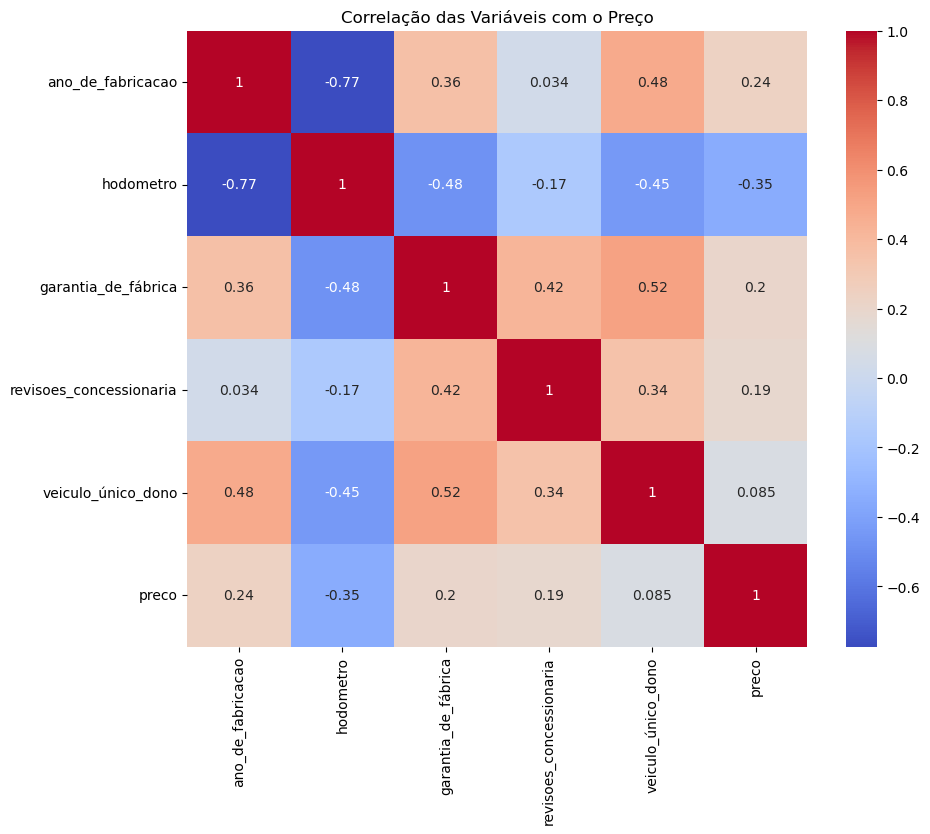

In [34]:
# Selecionar as colunas de interesse, incluindo a variável alvo "preco"
colunas_interesse = ['modelo', 'ano_de_fabricacao', 'hodometro','garantia_de_fábrica', 'revisoes_concessionaria', 'veiculo_único_dono','preco']

# Criar um novo dataframe com as colunas de interesse
df_interesse = df_carros_work[colunas_interesse]

# Calcular a matriz de correlação
matriz_correlacao = df_interesse.corr()

# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm")
plt.title('Correlação das Variáveis com o Preço')
plt.show()

### Análises do modelo mais vendido entre as principais marcas (Chevrolet Onix)

#### Relação entre Hodômetro e Preço

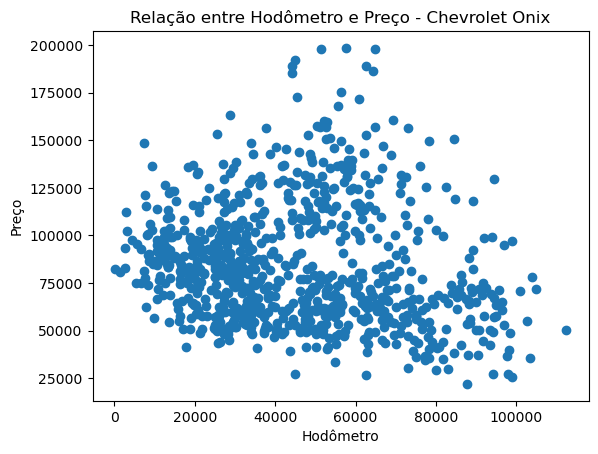

In [35]:
# Filtrar o dataframe apenas para os carros da marca Chevrolet e do modelo Onix
df_carros_filtrado_onix = df_carros_work[(df_carros_work['marca'] == 'CHEVROLET') & (df_carros_work['modelo'] == 'ONIX')]

# Criar o gráfico de dispersão
plt.scatter(df_carros_filtrado_onix['hodometro'], df_carros_filtrado_onix['preco'])
plt.xlabel('Hodômetro')
plt.ylabel('Preço')
plt.title('Relação entre Hodômetro e Preço - Chevrolet Onix')

# Exibir o gráfico
plt.show()

#### Relação entre Ano de Fabricação e Preço

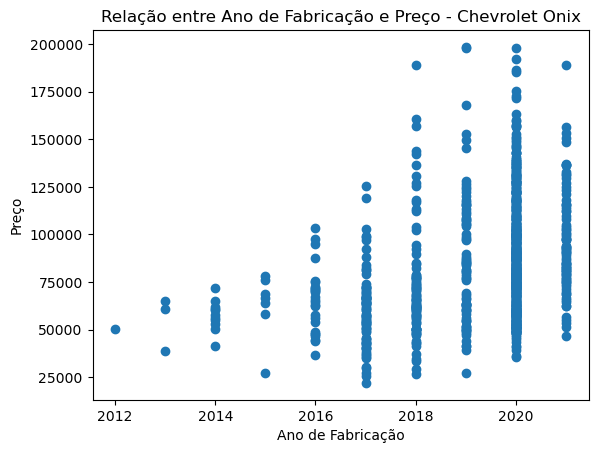

In [36]:
# Criar o gráfico de dispersão
plt.scatter(df_carros_filtrado_onix['ano_de_fabricacao'], df_carros_filtrado_onix['preco'])
plt.xlabel('Ano de Fabricação')
plt.ylabel('Preço')
plt.title('Relação entre Ano de Fabricação e Preço - Chevrolet Onix')

# Exibir o gráfico
plt.show()

### Hipotese 1: Carros com Garantia de Fábrica possuem preço mais alto
####  gráfico de boxplot para visualizar a relação entre a garantia de fábrica e o preço dos veículos

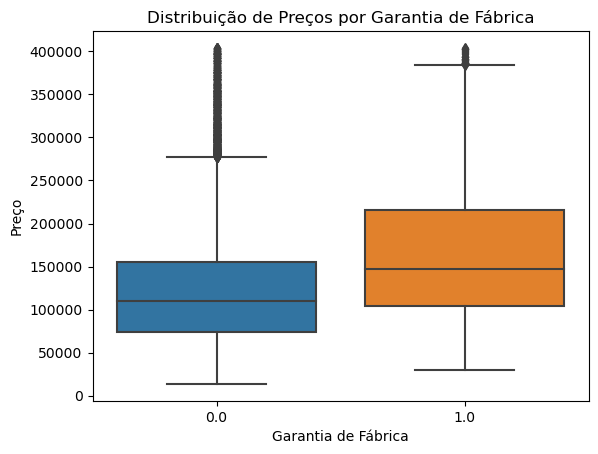

In [37]:
sns.boxplot(x='garantia_de_fábrica', y='preco', data=df_carros_work)
plt.xlabel('Garantia de Fábrica')
plt.ylabel('Preço')
plt.title('Distribuição de Preços por Garantia de Fábrica')
plt.show()

Refazendo o gráfico filtrando apenas o modelo Chevrolet Onix:

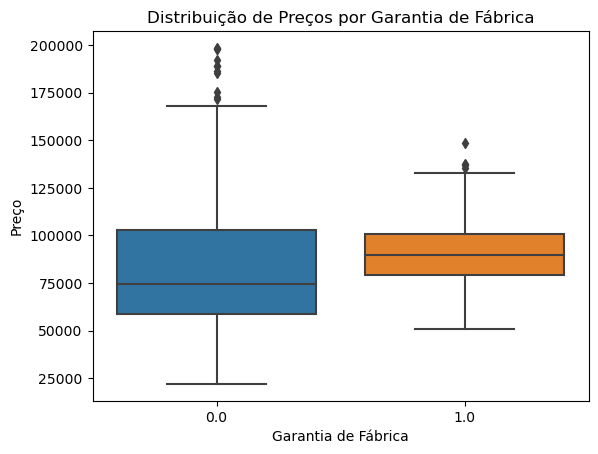

In [38]:
sns.boxplot(x='garantia_de_fábrica', y='preco', data=df_carros_filtrado_onix)
plt.xlabel('Garantia de Fábrica')
plt.ylabel('Preço')
plt.title('Distribuição de Preços por Garantia de Fábrica')
plt.show()

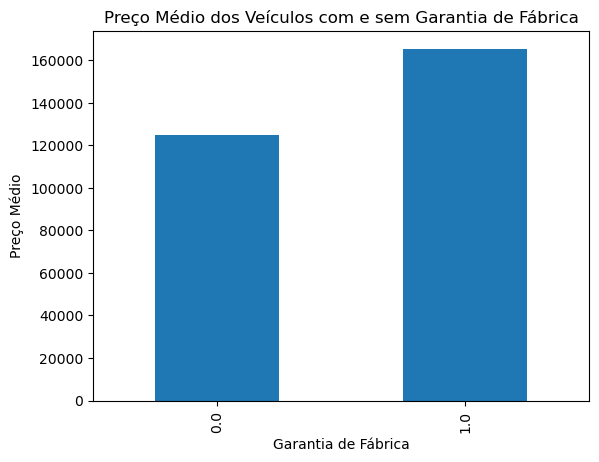

In [39]:
df_garantia = df_carros_work.groupby('garantia_de_fábrica')['preco'].mean()
df_garantia.plot(kind='bar')
plt.xlabel('Garantia de Fábrica')
plt.ylabel('Preço Médio')
plt.title('Preço Médio dos Veículos com e sem Garantia de Fábrica')
plt.show()

### Hipotese 2: Carros com único dono  possuem preço mais alto
####  gráfico de boxplot para visualizar a relação entre único dono e o preço dos veículos

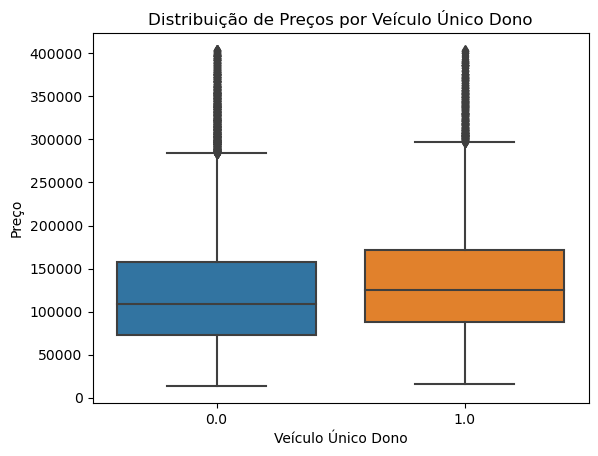

In [40]:
sns.boxplot(x='veiculo_único_dono', y='preco', data=df_carros_work)
plt.xlabel('Veículo Único Dono')
plt.ylabel('Preço')
plt.title('Distribuição de Preços por Veículo Único Dono')
plt.show()

Refazendo o gráfico filtrando apenas o modelo Chevrolet Onix:

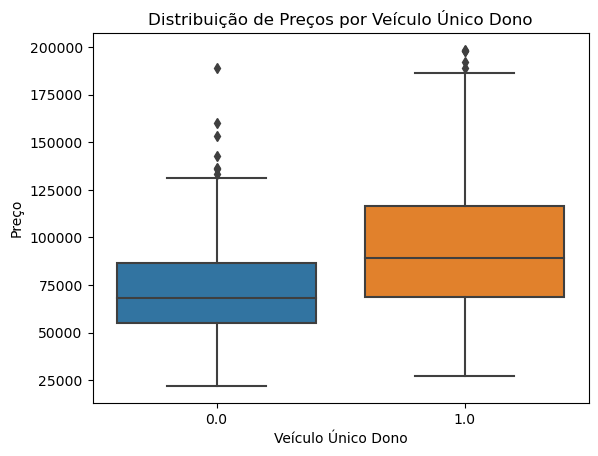

In [41]:
sns.boxplot(x='veiculo_único_dono', y='preco', data=df_carros_filtrado_onix)
plt.xlabel('Veículo Único Dono')
plt.ylabel('Preço')
plt.title('Distribuição de Preços por Veículo Único Dono')
plt.show()

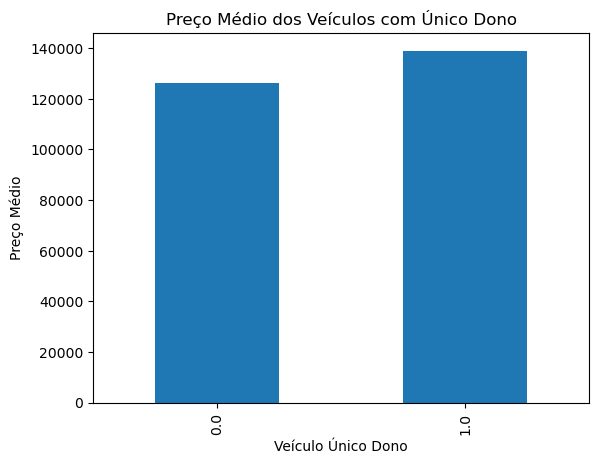

In [42]:
df_garantia = df_carros_work.groupby('veiculo_único_dono')['preco'].mean()
df_garantia.plot(kind='bar')
plt.xlabel('Veículo Único Dono')
plt.ylabel('Preço Médio')
plt.title('Preço Médio dos Veículos com Único Dono')
plt.show()

### Hipótese 3: Carros com menor quilometragem possuem preço mais alto
####  gráfico de dispersão dos carros fabricados em 2019 com a relação entre preço e hodômetro

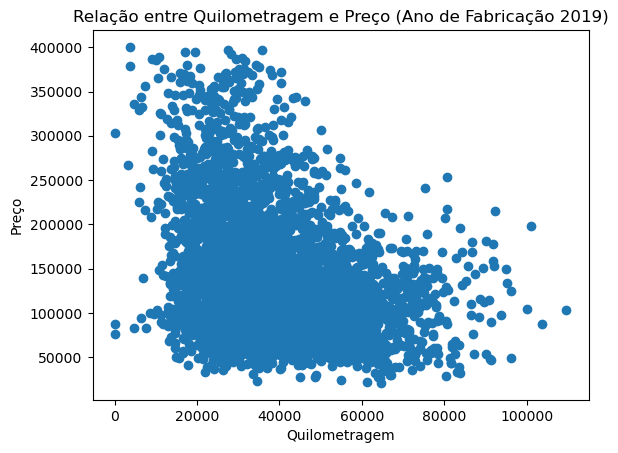

In [43]:
df_carros_2019 = df_carros_work[df_carros_work['ano_de_fabricacao'] == 2019]

plt.scatter(df_carros_2019['hodometro'], df_carros_2019['preco'])
plt.xlabel('Quilometragem')
plt.ylabel('Preço')
plt.title('Relação entre Quilometragem e Preço (Ano de Fabricação 2019)')
plt.show()

### Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

Vamos analisar o preço médio e a quantidade de carros vendidos por estado, considerando para a análise os dois carros populares mais vendidos (Chevrolet Onix e VW Polo)

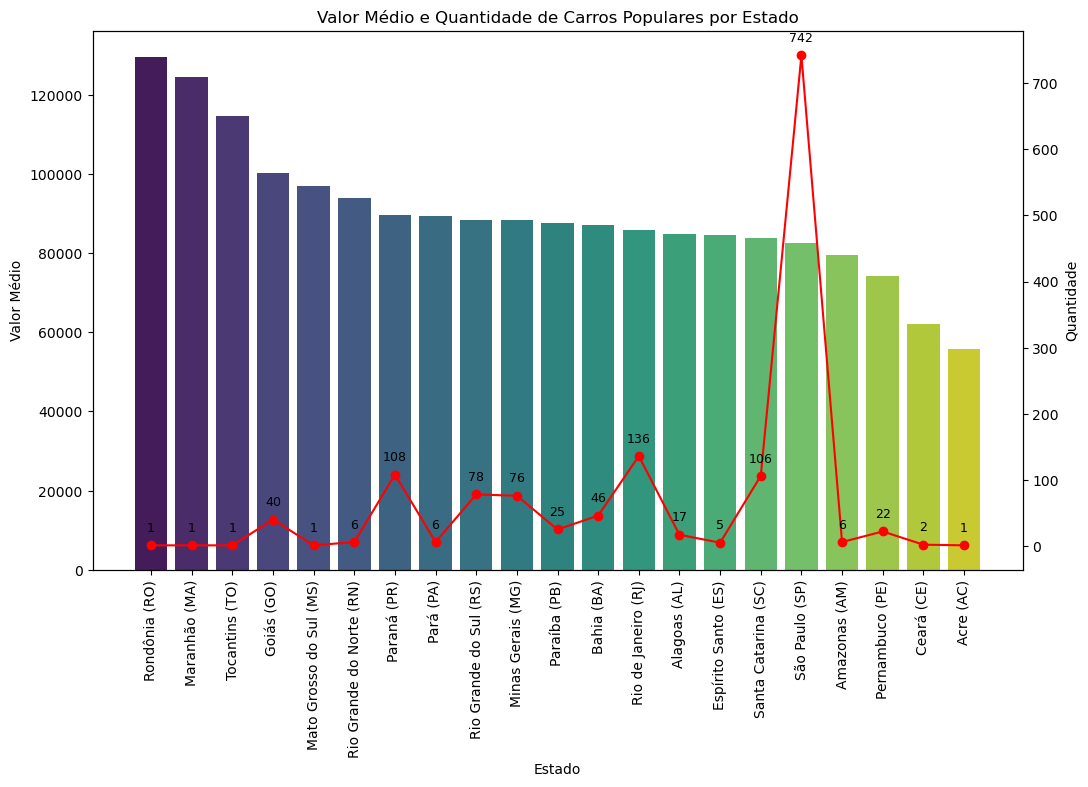

In [44]:
# Filtrar o dataframe para incluir apenas os carros populares (Chevrolet Onix e Volkswagen Polo)
df_populares = df_carros_work[(df_carros_work['modelo'] == 'ONIX') | (df_carros_work['modelo'] == 'POLO')]

# Calcular o valor médio dos carros populares por estado
valor_medio_por_estado = df_populares.groupby('estado_vendedor')['preco'].mean()
valor_medio_por_estado = valor_medio_por_estado.sort_values(ascending=False)

# Calcular a quantidade de carros populares por estado
quantidade_por_estado = df_populares['estado_vendedor'].value_counts().loc[valor_medio_por_estado.index]

# Criar o gráfico de barras com o valor médio
fig, ax1 = plt.subplots(figsize=(12, 7))
sns.barplot(x=valor_medio_por_estado.index, y=valor_medio_por_estado.values, palette='viridis', ax=ax1)
ax1.set_xlabel('Estado')
ax1.set_ylabel('Valor Médio')
ax1.set_title('Valor Médio e Quantidade de Carros Populares por Estado')
ax1.tick_params(axis='x', rotation=90)

# Adicionar o gráfico de linha com a quantidade
ax2 = ax1.twinx()
ax2.plot(quantidade_por_estado.index, quantidade_por_estado.values, color='red', marker='o')
ax2.set_ylabel('Quantidade')

# Adicionar rótulos acima de cada ponto do gráfico de linha
for i, j in zip(quantidade_por_estado.index, quantidade_por_estado.values):
    ax2.annotate(str(j), xy=(i, j), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=9)

plt.show()

### Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

Vamos analisar o preço médio e a quantidade de carros vendidos por estado que sejam picapes automáticas

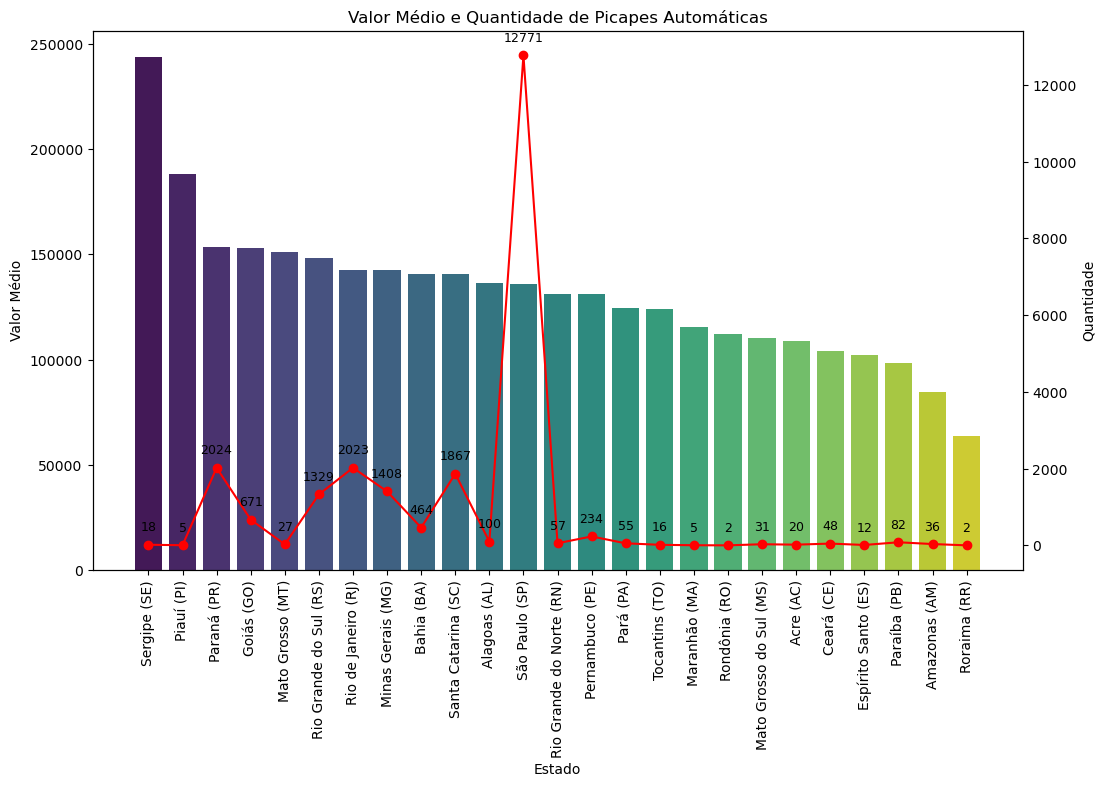

In [45]:
# Filtrar o dataframe para incluir apenas picapes automáticas
df_picape_automatica = df_carros_work[(df_carros_work['tipo'] == 'Picape') | (df_carros_work['cambio'] == 'Automática')]

# Calcular o valor médio das picapes automáticas
valor_medio_por_estado = df_picape_automatica.groupby('estado_vendedor')['preco'].mean()
valor_medio_por_estado = valor_medio_por_estado.sort_values(ascending=False)

# Calcular a quantidade de picapes automáticas
quantidade_por_estado = df_picape_automatica['estado_vendedor'].value_counts().loc[valor_medio_por_estado.index]

# Criar o gráfico de barras com o valor médio
fig, ax1 = plt.subplots(figsize=(12, 7))
sns.barplot(x=valor_medio_por_estado.index, y=valor_medio_por_estado.values, palette='viridis', ax=ax1)
ax1.set_xlabel('Estado')
ax1.set_ylabel('Valor Médio')
ax1.set_title('Valor Médio e Quantidade de Picapes Automáticas')
ax1.tick_params(axis='x', rotation=90)

# Adicionar o gráfico de linha com a quantidade
ax2 = ax1.twinx()
ax2.plot(quantidade_por_estado.index, quantidade_por_estado.values, color='red', marker='o')
ax2.set_ylabel('Quantidade')

# Adicionar rótulos acima de cada ponto do gráfico de linha
for i, j in zip(quantidade_por_estado.index, quantidade_por_estado.values):
    ax2.annotate(str(j), xy=(i, j), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=9)

plt.show()

### Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

Vamos analisar o preço médio e a quantidade de carros vendidos ainda na garantia de fábrica

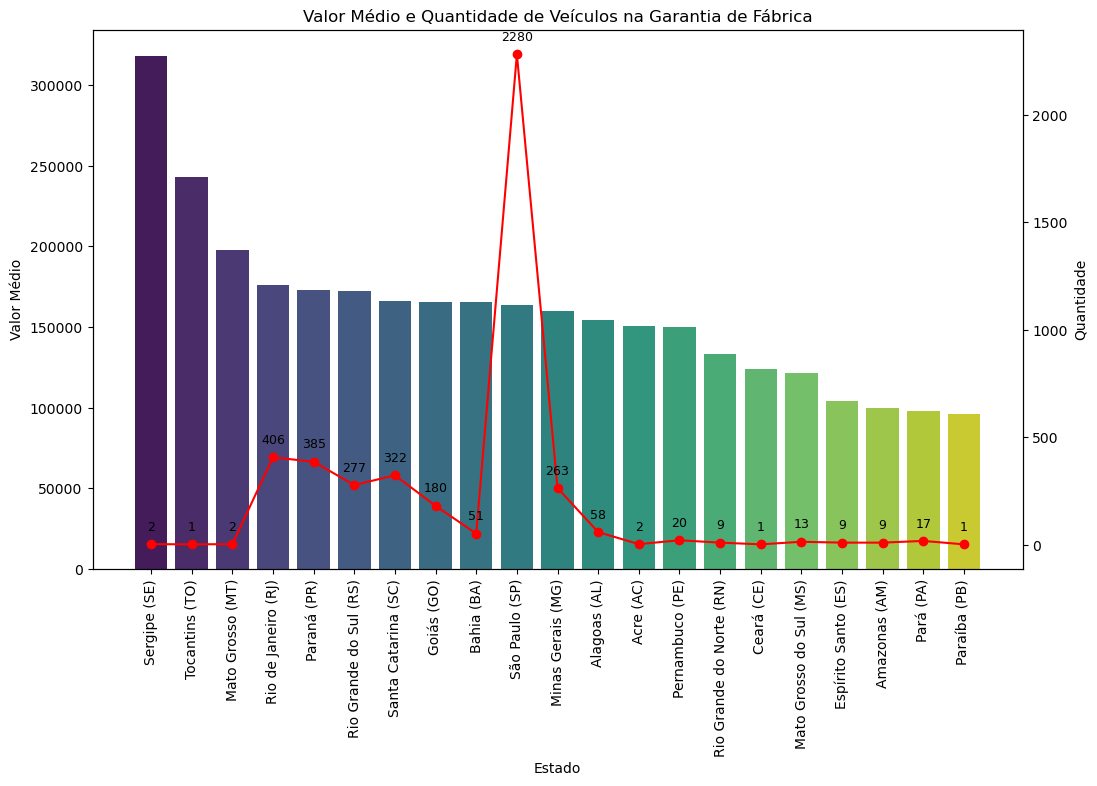

In [46]:
# Filtrar o dataframe para incluir apenas picapes automáticas
df_compra_garantia = df_carros_work[(df_carros_work['garantia_de_fábrica'] == 1)]

# Calcular o valor médio das picapes automáticas
valor_medio_por_estado = df_compra_garantia.groupby('estado_vendedor')['preco'].mean()
valor_medio_por_estado = valor_medio_por_estado.sort_values(ascending=False)

# Calcular a quantidade de picapes automáticas
quantidade_por_estado = df_compra_garantia['estado_vendedor'].value_counts().loc[valor_medio_por_estado.index]

# Criar o gráfico de barras com o valor médio
fig, ax1 = plt.subplots(figsize=(12, 7))
sns.barplot(x=valor_medio_por_estado.index, y=valor_medio_por_estado.values, palette='viridis', ax=ax1)
ax1.set_xlabel('Estado')
ax1.set_ylabel('Valor Médio')
ax1.set_title('Valor Médio e Quantidade de Veículos na Garantia de Fábrica')
ax1.tick_params(axis='x', rotation=90)

# Adicionar o gráfico de linha com a quantidade
ax2 = ax1.twinx()
ax2.plot(quantidade_por_estado.index, quantidade_por_estado.values, color='red', marker='o')
ax2.set_ylabel('Quantidade')

# Adicionar rótulos acima de cada ponto do gráfico de linha
for i, j in zip(quantidade_por_estado.index, quantidade_por_estado.values):
    ax2.annotate(str(j), xy=(i, j), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=9)

plt.show()

## Conclusão

Após análise dos dados informados, com o tratamento dos valores faltantes, outliers e mapeamento de variáveis categóricas binárias (sim/não), podemos observar informações relevantes.

Metade dos carros listados custam até 115 mil reais, porém alguns passam de 1 milhão. São Paulo é disparado o maior mercado, com mais de 55% dos veículos listados.

Volkswagem é a marca mais negociada, porém o modelo de maior sucesso é o Compass da Jeep. E por sucesso, também podemos dizer que a cor branca é disparada na sua categoria, representando mais de 72% dos veículos.

Em relação ao ano de fabricação, foram negociados preferencialmente os carros fabricados de 2017 a 2019. 


Para as hipóteses e questões levantadas, chegamos aos seguintes resultados:

- ### Hipótese 1 - Veículos com garantia de fábrica podem ter maior apelo e serem vendidos a preços mais altos.
Os carros com Garantia de Fábrica tendem a se menos desvalorizados, podendo ser observado pela proximidade dos quartis. Também é possível verificar que o preço médio de carros com Garantia de Fábrica é superior aos que não possuem.

- ### Hipótese 2 - Veículos com apenas um dono são mais valorizados pelos compradores e podem ter preços mais altos
Veículos com único dono possuem maior valor médio. Fazendo a análise para o modelo popular mais vendido (Chevrolet Onix) fica evidenciado valores maiores em todos os quartis.

- ### Hipótese 3 - Veículos com menor quilometragem têm maior demanda e podem ter preços mais altos.
Para verificação da hipótese foi selecionado o ano de 2019, pelo alto volume de negociações nele. Desta forma conseguimos analisar melhor o impacto da quilometragem no preço obtido. Neste caso, conseguimos visualizar a curva descendente, que confirma a hipótese que quanto mais rodado o veículo for a tendência é ter o valor diminuído.

- ### Questionamento 1 - Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
Para esta análise filtamos os dois modelos populares mais negociados: Chevrolet Onix e Volkswagem Polo. Se a intenção é obter uma venda rápida, SP é o melhor estado, pois possui grande volume de negociações. Para obter melhor relação do valor de venda e ainda ter uma boa liquidez, PR é a melhor escolha, pois possui o 7º maior valor de revenda e a 3ª maior liquidez.

- ### Questionamento 2- Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
Para quem quer maior variedade de modelos, SP é o vencedor, com uma oferta muito acima da segunda UF. Já pensando em melhor valor na compra e ainda ter liquidez razoavel, PB é a melhor escolha com o 3º menor valor de revenda a a 11ª maior liquidez.

- ### Questionamento 3- Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?
Para carros dentro da garantia, SP é o melhor estado, uma vez que a oferta é muito superior aos demais ao passo que os valores não diferem tanto dos 6 estados com maior liquidez. 


